# Python setup

In [1]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

c:\Oystein\UIS\Introduksjon datavitenskap\dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Find how many series and movies have been added each year.
- First find when series and movies were released to see the how many new and old productions they have in the catalouge
- See when series and movies were added to netflix catlouge


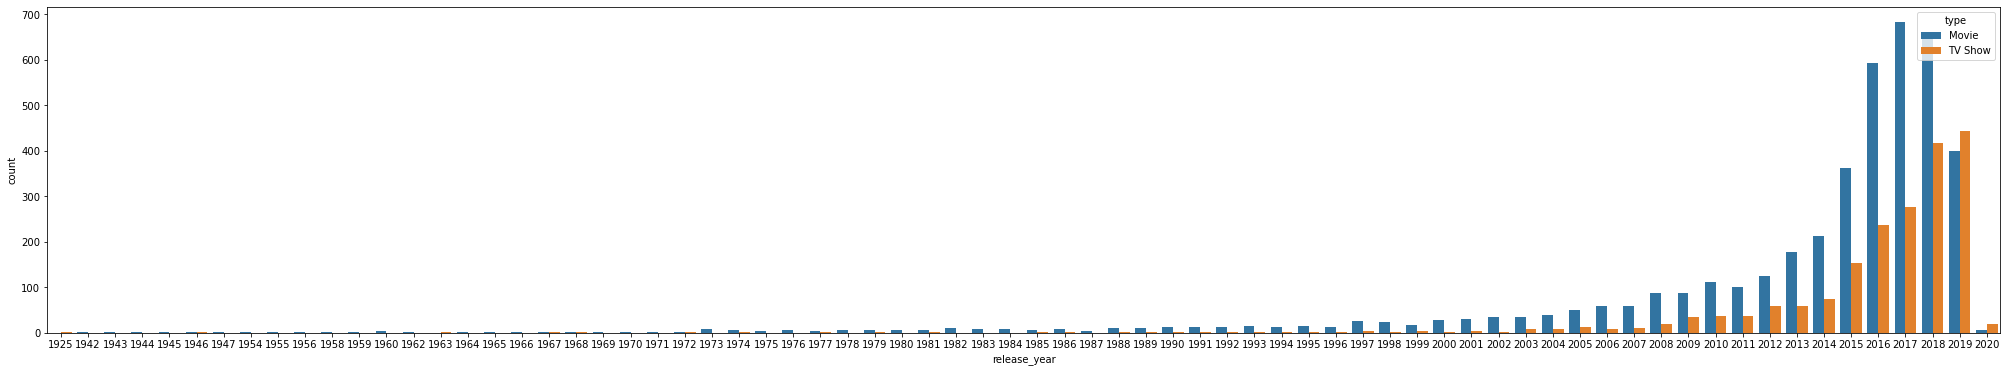

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (35,6))
sns.countplot(x='release_year', data = data_set, hue='type')

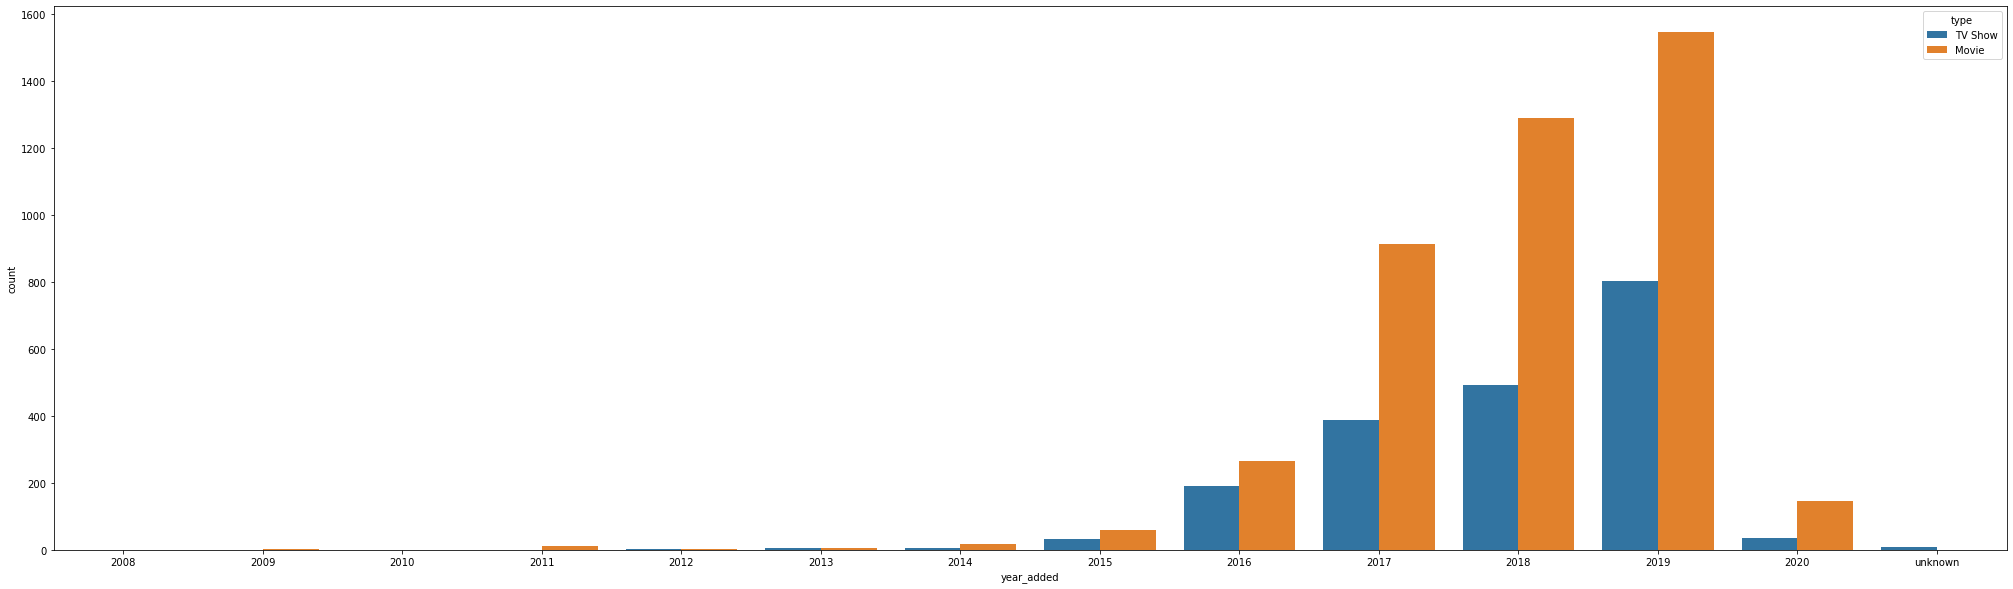

In [3]:
# See when series and movies where added to netflix catalouge
df = data_set.copy()
df['year_added'] = df['date_added'].str[-4:]
df['year_added'].replace({"dded": "unknown"}, inplace = True)
df.sort_values(by=['year_added'], inplace=True)

plt.figure(figsize = (35,10))
sns.countplot(x=df['year_added'], data = df, hue='type')


In [4]:
# Check when they added new and old content to the library

data_set['release_year'].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

In [5]:
data_set.shape

(6234, 12)

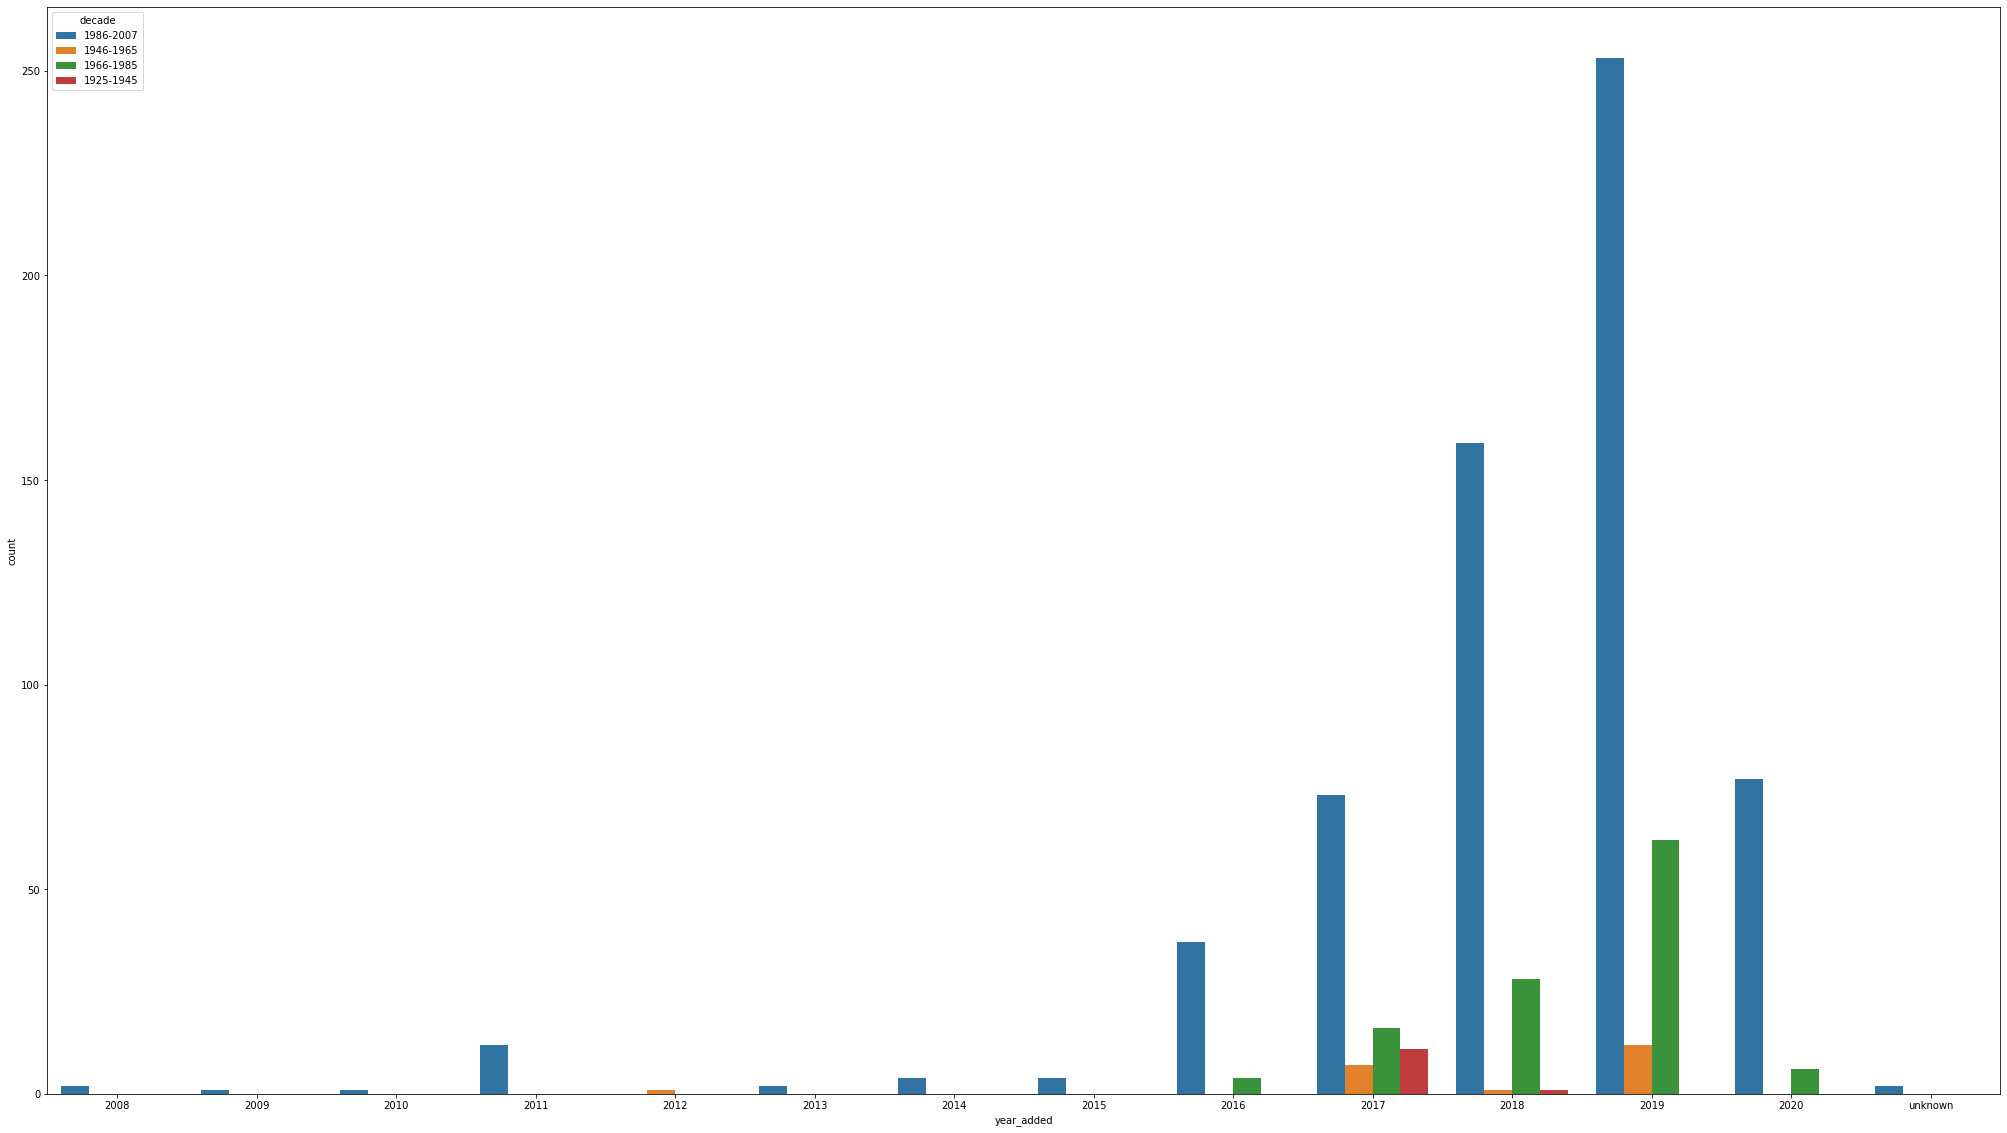

In [6]:
import numpy as np

# Ceck when netflix started to add older content to the catalouge

df['decade'] = ""   # Make new column in the dataset

# Make conditions for the plot
conditions = [
    (df['release_year'] >= 1925) & (df['release_year'] <= 1945),
    (df['release_year'] >= 1946) & (df['release_year'] <= 1965),
    (df['release_year'] >= 1966) & (df['release_year'] <= 1985),
    (df['release_year'] >= 1986) & (df['release_year'] <= 2007),
    (df['release_year'] >= 2008) & (df['release_year'] <= 2020)
]

values = ['1925-1945', '1946-1965', '1966-1985', '1986-2007', '2008-2020'] # Which value to add to the decade column

df['decade'] = np.select(conditions, values)   # Add values to decade

df.drop(df.loc[df['decade']=='2008-2020'].index, inplace=True)  # Drop content made after netflixc was released


plt.figure(figsize = (35,20))
sns.countplot(x=df['year_added'], data = df, hue='decade')



In [7]:
data_set.shape


(6234, 12)

In [8]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [9]:
import re


#Make a new dataset and clean the title and description column

new_set = data_set

# function for cleaning text. Remove everything except alphabet. 
def clean_text(text):
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text



In [10]:
# Make a new data fram and clean to fit purpose
new_set = data_set.copy()
new_set = new_set[new_set['type'] == 'Movie'] # Keep only moves
new_set['genre'] = new_set['listed_in'].apply(lambda x: x.split(', ')) # Make a new column where each row is a list of genre

# Clean the data set by removing everything that is not alphabet and set to lower case 

new_set['clean_desc'] = new_set['description'].apply(lambda x: clean_text(x)) # Clean the descriptio column
new_set['clean_title'] = new_set['title'].apply(lambda x: clean_text(x))      # Clean the title column
new_set['genre'] = (new_set.genre.map(set)-{'International Movies'}).map(list)  # Remove International movies
new_set['title_description'] = new_set['clean_title'] + str(" ") + new_set['clean_desc']    # Join the description and title

In [11]:
# There is a duplicate
duplicate = new_set[new_set.duplicated('title_description')]
duplicate

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,clean_desc,clean_title,title_description
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,"[Action & Adventure, Dramas]",a ruthless businessman s mission to expose ele...,sarkar,sarkar a ruthless businessman s mission to exp...


In [12]:
all_words = new_set['title_description'].str.split(expand=True).stack()
#all_words
type(all_words)

pandas.core.series.Series

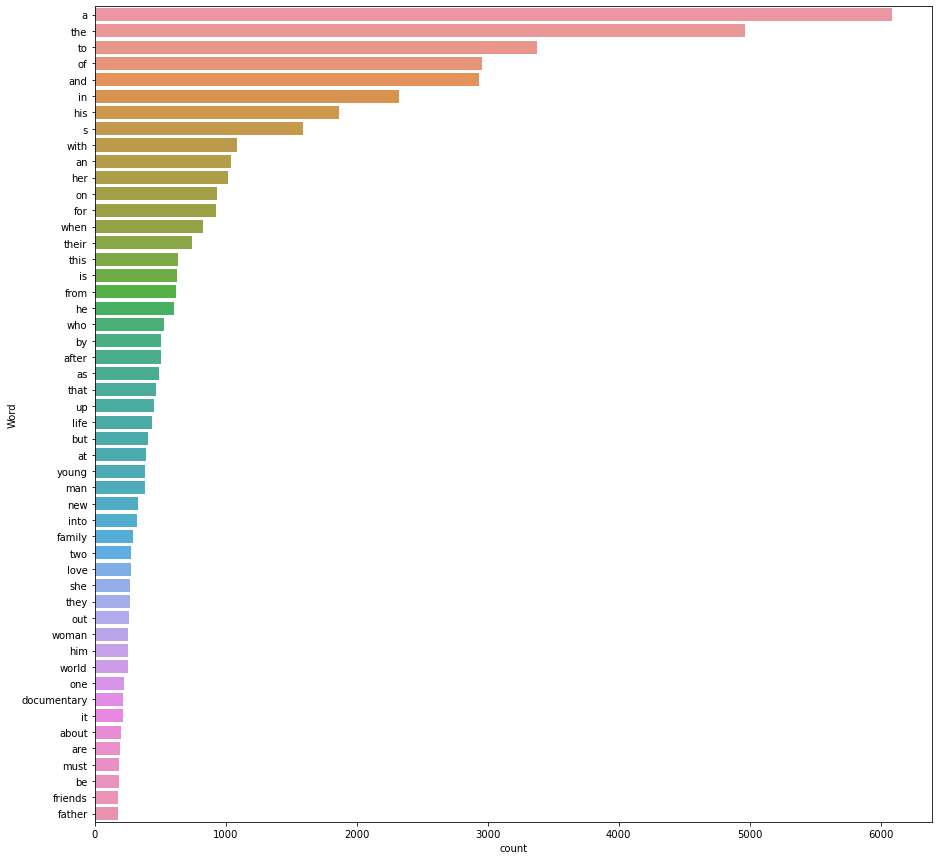

In [13]:
# Function for finding the frequency og words and plotting them 
def frequency_words(text, n):
    all_words = text.str.split(expand=True).stack() # Takes all the words and make data frame with one column and all the words
    frequency_words = nltk.FreqDist(all_words)   # Find the frequency of all the words
    words_df = pd.DataFrame({'word':list(frequency_words.keys()), 'count':list(frequency_words.values())}) # Make a data frame with two columns. 
                                                                                                           #The word from keys() and the count from value()

    most_frequent = words_df.nlargest(columns="count", n = n) # Take out the n most frequent words
  
    # visualize words and frequencies
    plt.figure(figsize=(15,15)) 
    ax = sns.barplot(data=most_frequent, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

# print 50 most frequent words 
frequency_words(new_set['title_description'], 50) 


In [14]:
# Function for removing all common stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
# found in geeksforgeeks https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def remove_stopwords(text):
    remove_stopwords = [w for w in text.split() if not w in stop_words]
    return ' '.join(remove_stopwords)

new_set['title_description'] = new_set['title_description'].apply(lambda x: remove_stopwords(x))

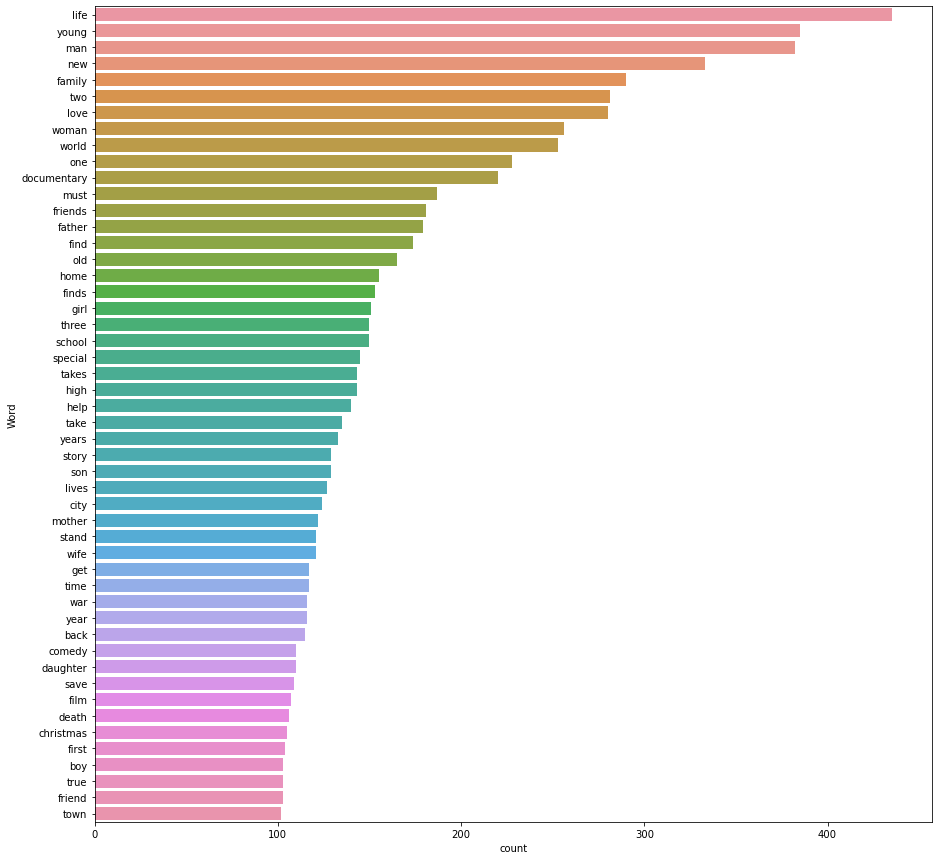

In [15]:
# Plot again to see the most common words after the stop words are removed

frequency_words(new_set['title_description'], 50) 

In [16]:
# Handle several labels in each genre. 
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html?highlight=multilabel#sklearn.preprocessing.MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_set['genre'])

# transform target variable. This is the y-value when we split the trainset
y = multilabel_binarizer.transform(new_set['genre'])

# We see that the genres are represented as a binary vector with values
# An 1 represent that this row have the following genre
print(y[3])
# By taking inverse transform we can see what genre the binary represents
print(multilabel_binarizer.inverse_transform(y)[3])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
('Sci-Fi & Fantasy', 'Thrillers')


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_df=0.1, max_features=1000)

In [18]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(new_set['title_description'], y, test_size=0.2, random_state=9)

In [19]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [20]:
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html?highlight=onevsrestclassifier#sklearn.multiclass.OneVsRestClassifier
# The one vs rest classifier is a common strategy for multiclass classification 
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
model = LogisticRegression()
clf = OneVsRestClassifier(model)

In [22]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [23]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [24]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.32752992383025026

In [25]:
clf.score(xtrain_tfidf, ytrain)

0.18815943728018758

In [26]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
y_pred_prob

array([[0.03446498, 0.00728126, 0.03543945, ..., 0.07223419, 0.02016862,
        0.05922904],
       [0.19696716, 0.01532977, 0.05564581, ..., 0.01718283, 0.02565132,
        0.04133626],
       [0.0595691 , 0.00810577, 0.07353589, ..., 0.20479487, 0.02332132,
        0.03765476],
       ...,
       [0.11116286, 0.00775252, 0.05855647, ..., 0.04467219, 0.02231008,
        0.15540308],
       [0.07903278, 0.00916469, 0.04542486, ..., 0.04182309, 0.06543656,
        0.07649459],
       [0.14824449, 0.0135159 , 0.09351774, ..., 0.02809175, 0.06314376,
        0.0855435 ]])

In [27]:
t = 0.2 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [28]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5187424425634825

In [29]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [30]:
for i in range(100): 
  k = xval.sample(1).index[0] 
  print("Movie: ", new_set['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",new_set['genre'][k], "\n")


Movie:  Burn Out 
Predicted genre:  [('Dramas',)]
Actual genre:  ['Action & Adventure'] 

Movie:  I Am Wrath 
Predicted genre:  [()]
Actual genre:  ['Action & Adventure', 'Dramas'] 

Movie:  In Darkness 
Predicted genre:  [('Dramas',)]
Actual genre:  ['Thrillers', 'Independent Movies'] 

Movie:  Natural Selection 
Predicted genre:  [()]
Actual genre:  ['Independent Movies', 'Dramas'] 

Movie:  People You May Know 
Predicted genre:  [()]
Actual genre:  ['Romantic Movies', 'Comedies', 'Dramas'] 

Movie:  National Lampoon's Loaded Weapon 1 
Predicted genre:  [()]
Actual genre:  ['Comedies', 'Action & Adventure', 'Independent Movies'] 

Movie:  Andhadhun 
Predicted genre:  [()]
Actual genre:  ['Comedies', 'Dramas'] 

Movie:  Judy Moody and the Not Bummer Summer 
Predicted genre:  [('Comedies',)]
Actual genre:  ['Children & Family Movies', 'Comedies'] 

Movie:  Unruly Friends 
Predicted genre:  [('Dramas',)]
Actual genre:  ['Thrillers'] 

Movie:  Sebastian Maniscalco: Why Would You Do That 

We see that the model strugles to find many genres. Lets check what we can to with the dataset.
- Try and remove some genres from the dataset 

In [31]:
# Lets check all the unique genres we have in the dataset and the count.
movie_genres_df = data_set['listed_in'].loc[data_set['type'] == 'Movie'].str.split(', ').explode().value_counts()
tvshow_genres_df = data_set['listed_in'].loc[data_set['type'] == 'TV Show'].str.split(', ').explode().value_counts()

print(movie_genres_df)

International Movies        1927
Dramas                      1623
Comedies                    1113
Documentaries                668
Action & Adventure           597
Independent Movies           552
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Stand-Up Comedy              281
Horror Movies                262
Music & Musicals             243
Sci-Fi & Fantasy             193
Sports Movies                157
Classic Movies                84
LGBTQ Movies                  60
Movies                        56
Cult Movies                   55
Faith & Spirituality          47
Anime Features                45
Name: listed_in, dtype: int64


In [32]:
print(tvshow_genres_df)

International TV Shows          1001
TV Dramas                        599
TV Comedies                      436
Crime TV Shows                   363
Kids' TV                         328
Docuseries                       279
Romantic TV Shows                278
British TV Shows                 210
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Spanish-Language TV Shows        117
Anime Series                     117
TV Mysteries                      69
TV Sci-Fi & Fantasy               68
Science & Nature TV               67
TV Horror                         54
TV Thrillers                      44
Teen TV Shows                     44
Stand-Up Comedy & Talk Shows      42
Classic & Cult TV                 24
TV Shows                          10
Name: listed_in, dtype: int64


Let us try and fix the genre column again
 - Remove International movies and Tv_shows
 - Remove genre movies and tv shows
 - Set all genres under 100 to other
 - Remove TV from excisting genres in movies
 - Combine similar genres to one genre

In [33]:
new_set2 = data_set.copy()

replacements = {
        "International Movies": "International",
        "Independent Movies": "Independent",
        "Children & Family Movies": "Children & Family",
        "Romantic Movies": "Romantic",
        "Stand-Up Comedy": "Comedies",
        "Horror Movies": "Horror",
        "Sports Movies": "Sport",
        "Classic Movies": "Classic",
        "LGBTQ Movies": "Other",
        "Cult Movies": "Other",
        "Faith & Spirituality": "Other",
        "Anime Features": "Anime",
        "Anime Features": "Other",
        "International TV Shows": "International",
        "TV Dramas": "Drama",
        "TV Comedies": "Comedies",
        "Crime TV Shows": "Crime",
        "Kids' TV": "Children & Family",
        "Docuseries": "Documentaries",
        "Romantic TV Shows": "Romantic",
        "British TV Shows": "International",
        "Reality TV": "Reality",
        "Korean TV Shows": "International",
        "TV Action & Adventure": "Action & Adventure",
        "Anime Series": "Anime",
        "Spanish-Language TV Shows": "International",
        "TV Sci-Fi & Fantasy": "Sci-Fi & Fantasy",
        "Science & Nature TV": "Documentaries",
        "TV Horror": "Horror",
        "Teen TV Shows": "Other",
        "TV Thrillers": "Thrillers",
        "Stand-Up Comedy & Talk Shows": "Comedies",
        "Classic & Cult TV": "Other",
        "TV Shows": "Other",
        "Movies": "Other"
    } 

new_set2['listed_in'] = new_set2.listed_in.replace(replacements, regex=True)

In [34]:
new_set2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Comedies,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Children & Family,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Children & Family,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"Action & Adventure, Comedies, Sci-Fi & Fantasy","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Other,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"International, Comedies, Drama","Set during the Russian Revolution, this comic ..."


In [35]:
# Make a new data fram and clean to fit purpose
new_set2['genre'] = new_set2['listed_in'].apply(lambda x: x.split(', ')) # Make a new column where each row is a list of genre
new_set2 = new_set2[new_set2['type'] == 'TV Show']

# Clean the data set by removing everything that is not alphabet and set to lower case 

new_set2['clean_desc'] = new_set2['description'].apply(lambda x: clean_text(x)) # Clean the descriptio column
new_set2['clean_title'] = new_set2['title'].apply(lambda x: clean_text(x))      # Clean the title column
#new_set2['genre'] = (new_set2.genre.map(set)-{'International'}).map(list)  # Remove International movies
new_set2['title_description'] = new_set2['clean_title'] + str(" ") + new_set2['clean_desc']    # Join the description and title

new_set2['title_description'] = new_set2['title_description'].apply(lambda x: remove_stopwords(x))

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_set2['genre'])

# transform target variable. This is the y-value when we split the trainset
y = multilabel_binarizer.transform(new_set2['genre'])

# We see that the genres are represented as a binary vector with 19 values
# A 1 represent that this row have the following genre
print(y[3])
# By taking inverse transform we can see what genre the binary represents
print(multilabel_binarizer.inverse_transform(y)[3])

print(multilabel_binarizer.classes_)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
('Documentaries',)
['Action & Adventure' 'Anime' 'Children & Family' 'Comedies'
 'Comedies & Talk Shows' 'Crime' 'Documentaries' 'Drama' 'Horror'
 'International' 'Other' 'Reality' 'Romantic' 'Sci-Fi & Fantasy'
 'TV Mysteries' 'Thrillers']


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000)

In [38]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(new_set2['title_description'], y, test_size=0.2, random_state=0)

In [39]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [40]:
type(xval_tfidf)
print(xval_tfidf)


  (0, 1535)	0.2377815523662583
  (0, 1227)	0.3377762394797136
  (0, 1085)	0.3925107047930762
  (0, 1062)	0.20832208824011642
  (0, 828)	0.2377815523662583
  (0, 800)	0.3682903180495233
  (0, 742)	0.2748665150169674
  (0, 659)	0.36199662622326645
  (0, 339)	0.3682903180495233
  (0, 315)	0.3122429466185098
  (1, 1580)	0.6582777831402341
  (1, 1572)	0.17163239716292158
  (1, 836)	0.27021473188656725
  (1, 611)	0.2816724108163984
  (1, 352)	0.3243375456314296
  (1, 162)	0.3625858703383333
  (1, 98)	0.3849597060072785
  (2, 1710)	0.2695753834758112
  (2, 1545)	0.3684708855407641
  (2, 1406)	0.3398256806717514
  (2, 1081)	0.35982668760136666
  (2, 1046)	0.29561191854367547
  (2, 807)	0.32511326657910605
  (2, 739)	0.3786948016941806
  (2, 405)	0.34573390730665066
  :	:
  (391, 48)	0.49348517355547133
  (392, 1853)	0.2745964203448694
  (392, 1572)	0.16339626786242836
  (392, 1537)	0.300675596264587
  (392, 1366)	0.36648663235355483
  (392, 1280)	0.36648663235355483
  (392, 1248)	0.36648663235

In [41]:
model = LogisticRegression()
clf = OneVsRestClassifier(model)

In [42]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [43]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [44]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.4437140509449466

In [45]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [46]:
t = 0.3# threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [47]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5985130111524163

In [48]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [49]:
for i in range(100): 
  k = xval.sample(1).index[0] 
  print("Movie: ", new_set2['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",new_set2['genre'][k], "\n")

Movie:  We Speak Dance 
Predicted genre:  [()]
Actual genre:  ['Documentaries'] 

Movie:  Zombie Dumb 
Predicted genre:  [()]
Actual genre:  ['Children & Family', 'International', 'Comedies'] 

Movie:  Enemigo íntimo 
Predicted genre:  [('International',)]
Actual genre:  ['Crime', 'International', 'Drama'] 

Movie:  Bat Pat 
Predicted genre:  [()]
Actual genre:  ['Children & Family'] 

Movie:  What Happens to My Family 
Predicted genre:  [('International',)]
Actual genre:  ['International', 'Comedies', 'Drama'] 

Movie:  Rurouni Kenshin 
Predicted genre:  [()]
Actual genre:  ['Anime', 'International'] 

Movie:  Knights of Sidonia 
Predicted genre:  [()]
Actual genre:  ['Anime', 'International'] 

Movie:  Ultramarine Magmell 
Predicted genre:  [('International',)]
Actual genre:  ['Anime', 'International'] 

Movie:  Ares 
Predicted genre:  [('International',)]
Actual genre:  ['International', 'Drama', 'Horror'] 

Movie:  Swami Baba Ramdev: The Untold Story 
Predicted genre:  [('Internati

In [50]:
new_set2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,clean_desc,clean_title,title_description
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Children & Family,"With the help of three human allies, the Autob...",[Children & Family],with the help of three human allies the autobo...,transformers prime,transformers prime help three human allies aut...
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Children & Family,When a prison ship crash unleashes hundreds of...,[Children & Family],when a prison ship crash unleashes hundreds of...,transformers robots in disguise,transformers robots disguise prison ship crash...
5,80163890,TV Show,Apaches,Unknown director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime, International, International",A young journalist is forced into a life of cr...,"[Crime, International, International]",a young journalist is forced into a life of cr...,apaches,apaches young journalist forced life crime sav...
8,80117902,TV Show,Fire Chasers,Unknown director,Unknown cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Documentaries, Documentaries","As California's 2016 fire season rages, brave ...","[Documentaries, Documentaries]",as california s fire season rages brave backco...,fire chasers,fire chasers california fire season rages brav...
26,80244601,TV Show,Castle of Stars,Unknown director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Unknown country,"September 7, 2018",2015,TV-14,1 Season,"International, Romantic, Comedies",As four couples with different lifestyles go t...,"[International, Romantic, Comedies]",as four couples with different lifestyles go t...,castle of stars,castle stars four couples different lifestyles...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,Unknown director,Igor Dmitriev,Unknown country,Unknown date_added,2010,TV-Y,2 Seasons,Children & Family,A wacky rabbit and his gang of animal pals hav...,[Children & Family],a wacky rabbit and his gang of animal pals hav...,kikoriki,kikoriki wacky rabbit gang animal pals fun sol...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"Action & Adventure, Comedies, Sci-Fi & Fantasy","This parody of first-person shooter games, mil...","[Action & Adventure, Comedies, Sci-Fi & Fantasy]",this parody of first person shooter games mili...,red vs blue,red vs blue parody first person shooter games ...
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,Comedies,"Marc Maron stars as Marc Maron, who interviews...",[Comedies],marc maron stars as marc maron who interviews ...,maron,maron marc maron stars marc maron interviews f...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"International, Comedies, Drama","Set during the Russian Revolution, this comic ...","[International, Comedies, Drama]",set during the russian revolution this comic m...,a young doctor s notebook and other stories,young doctor notebook stories set russian revo...


In [51]:
multilabel_binarizer.inverse_transform(y)

'Reality',),
 ('Comedies',),
 ('Crime', 'Drama', 'International'),
 ('Drama', 'Sci-Fi & Fantasy'),
 ('Comedies', 'Comedies & Talk Shows'),
 ('Comedies', 'Comedies & Talk Shows'),
 ('Drama', 'International', 'Romantic'),
 ('International', 'Romantic'),
 ('Drama', 'International', 'Romantic'),
 ('Other',),
 ('Documentaries', 'International'),
 ('Drama', 'Thrillers'),
 ('Comedies', 'Drama', 'Romantic'),
 ('Action & Adventure', 'Comedies', 'International'),
 ('International', 'Romantic'),
 ('International', 'Romantic'),
 ('International', 'Romantic'),
 ('Crime', 'International'),
 ('International', 'Romantic'),
 ('International', 'Romantic'),
 ('Children & Family',),
 ('Documentaries',),
 ('Crime', 'Drama', 'International'),
 ('Crime', 'Drama', 'International'),
 ('International', 'Reality'),
 ('Documentaries', 'International'),
 ('Crime', 'Documentaries', 'TV Mysteries'),
 ('Children & Family',),
 ('Drama', 'International', 'Romantic'),
 ('Crime', 'Documentaries', 'International'),
 ('Com